# Chapter 12 回帰分析

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.formula.api as smf

%precision 3
%matplotlib inline

In [2]:
df = pd.read_csv('../data/ch12_scores_reg.csv')
n = len(df)
print(n)
df.head()

20


,小テスト,期末テスト,睡眠時間,通学方法
0,4.2,67,7.2,バス
1,7.2,71,7.9,自転車
2,0.0,19,5.3,バス
3,3.0,35,6.8,徒歩
4,1.5,35,7.5,徒歩


## 12.1 | 単回帰モデル

In [3]:
x = np.array(df['小テスト'])
y = np.array(df['期末テスト'])
p = 1

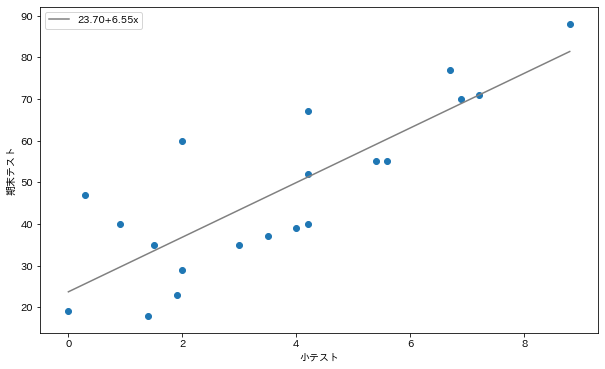

In [4]:
poly_fit = np.polyfit(x, y, 1)
poly_ld = np.poly1d(poly_fit)
xs = np.linspace(x.min(), x.max())
ys = poly_ld(xs)

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
ax.set_xlabel('小テスト')
ax.set_ylabel('期末テスト')
ax.plot(xs, ys, color='gray',
label=f'{poly_fit[1]:.2f}+{poly_fit[0]:.2f}x')
ax.scatter(x, y)
ax.legend()
plt.show()

### 12.1.1　回帰分析における仮説

回帰分析では次の 2 つを仮定する.
- 説明変数は確率変数ではない
- $誤差項 \epsilon_i は互いに独立に N (0, \sigma^2) に従う$

### 12.1.2　statsmodels による回帰分析

In [5]:
formula = '期末テスト ~ 小テスト'
result = smf.ols(formula, df).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  期末テスト   R-squared:                       0.676
Model:                            OLS   Adj. R-squared:                  0.658
Method:                 Least Squares   F-statistic:                     37.61
Date:                Tue, 05 May 2020   Prob (F-statistic):           8.59e-06
Time:                        13:49:46   Log-Likelihood:                -76.325
No. Observations:                  20   AIC:                             156.7
Df Residuals:                      18   BIC:                             158.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     23.6995      4.714      5.028      0.000      13.796      33.603
小テスト           6.5537      1.069      6.133      0.000       4.309       8.799
==============================================================================
Omnibus:                        2.139   Durbin-Watson:                   1.478
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.773
Skew:                           0.670   Prob(JB):                        0.412
Kurtosis:                       2.422   Cond. No.                         8.32
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 12.1.3　回帰係数

In [6]:
X = np.array([np.ones_like(x), x]).T
X

array([[1. , 4.2],
       [1. , 7.2],
       [1. , 0. ],
       [1. , 3. ],
       [1. , 1.5],
       [1. , 0.9],
       [1. , 1.9],
       [1. , 3.5],
       [1. , 4. ],
       [1. , 5.4],
       [1. , 4.2],
       [1. , 6.9],
       [1. , 2. ],
       [1. , 8.8],
       [1. , 0.3],
       [1. , 6.7],
       [1. , 4.2],
       [1. , 5.6],
       [1. , 1.4],
       [1. , 2. ]])

In [7]:
beta0_hat, beta1_hat = np.linalg.lstsq(X, y)[0]
beta0_hat, beta1_hat

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  """Entry point for launching an IPython kernel.


(23.69949534673122, 6.553732606043082)

In [8]:
y_hat = beta0_hat + beta1_hat * x
eps_hat = y - y_hat

In [9]:
s_var = np.var(eps_hat, ddof=p+1)
s_var

134.29043473495898

In [10]:
C0, C1 = np.diag(np.linalg.pinv(np.dot(X.T, X)))

In [11]:
np.sqrt(s_var * C0), np.sqrt(s_var * C1)

(4.713837012645705, 1.0685841387335373)

In [12]:
rv = stats.t(n-2)

lcl = beta0_hat - rv.isf(0.025) * np.sqrt(s_var * C0)
hcl = beta0_hat - rv.isf(0.975) * np.sqrt(s_var * C0)

lcl, hcl

(13.796091272760252, 33.60289942070219)

In [13]:
rv = stats.t(n-2)

lcl = beta1_hat - rv.isf(0.025) * np.sqrt(s_var * C1)
hcl = beta1_hat - rv.isf(0.975) * np.sqrt(s_var * C1)

lcl, hcl

(4.308720637125889, 8.798744574960274)

In [14]:
t = beta1_hat / np.sqrt(s_var * C1)
t

6.133099274532021

In [15]:
(1 - rv.cdf(t)) * 2

8.590875866687497e-06

In [16]:
t = beta0_hat / np.sqrt(s_var * C0)
t

5.0276442064401285

In [17]:
(1 - rv.cdf(t)) * 2

8.745298393209033e-05